# Part 2

## 1. If an encryption function $e_K$ is identical to the decryption function $d_K$, then the key $K$ is said to be an involutory key. Find all the involutory keys in the Shift Cipher


In the **Shift Cipher** (Caesar Cipher), encryption and decryption are defined as follows:

- **Encryption function**:
  \[
  e_K(x) = (x + K) mod 26
  \]
- **Decryption function**:
  \[
  d_K(y) = (y - K) mod 26
  \]

For a key \( K \) to be involutory, encryption must be identical to decryption:

\[
e_K(x) = d_K(x)
\]

### Finding Involutory Keys

Setting encryption equal to decryption:

\[
(x + K) mod 26 = (x - K) mod 26
\]

Canceling \( x \) from both sides:

\[
K equiv -K (mod 26)
\]

Adding \( K \) to both sides:

\[
2K equiv 0 (mod 26)
\]

Dividing by 2:

\[
K equiv 0 (mod 13)
\]

Since the shift cipher operates in modulo 26, the possible values of \( K \) are:

\[
K = 0     K = 13
\]

The involutory keys in the Shift Cipher are:

- \( K = 0 \) → No shift (identity transformation)
- \( K = 13 \) → **ROT13**, a self-inverse cipher where applying it twice restores the original text.


## 2. Suppose that π is the following permutation of $x \in \{1, . . . , 8\}: \pi(x) = \{4, 1, 6, 2, 7, 3, 8, 5\}$.
- Compute $\pi^{-1}$
- Decrypt the following ciphertext, for a Permutation Cipher with m = 8, which was encrypted using the key $\pi$: TGEEMNELNNTDROEOAAHDOETCSHAEIRLM

In [213]:
# Define pi
pi = [4,1,6,2,7,3,8,5]

# pi^-1
pi_inv = [0]*8
for i in range(8):
    """
    The value i+1 is assign to the position pi[i]-1 in pi_inv
    i = 0 
    pi[i] = 4
    pi_inv[4-1] = pi_inv[3] = 1
    """
    pi_inv[pi[i]-1] = i+1
print(pi_inv)

# decrypt the ciphertext
ciphertext = "TGEEMNELNNTDROEOAAHDOETCSHAEIRLM"
m = 8
# split the ciphertext into blocks of size m
ciphertext = [ciphertext[i:i+m] for i in range(0, len(ciphertext), m)]
print(ciphertext)
plaintext = ""
for block in ciphertext:
    """
    For each block, we reverse the permutation pi^-1
    1. We reverse the permutation pi^-1
    2. We concatenate the block
    3. We add the block to the plaintext
    TGEEMNEL -> the second letter is G, so is the first one in the plaintext
    the forth letter is E, so is the second one in the plaintext
    the sixth letter is N, so is the third one in the plaintext
    the first letter is T, so is the fourth one in the plaintext
    the eighth letter is L, so is the fifth one in the plaintext
    the third letter is E, so is the sixth one in the plaintext
    the fifth letter is M, so is the seventh one in the plaintext
    the seventh letter is E, so is the eighth one in the plaintext
    the plaintext is GENTLEME
    """
    block = [block[i-1] for i in pi_inv]
    plaintext += "".join(block)
print(plaintext)

[2, 4, 6, 1, 8, 3, 5, 7]
['TGEEMNEL', 'NNTDROEO', 'AAHDOETC', 'SHAEIRLM']
GENTLEMENDONOTREADEACHOTHERSMAIL


In [214]:
print('GENTLE MEN DO NOT READ EACH OTHERS MAIL')

GENTLE MEN DO NOT READ EACH OTHERS MAIL


## 3. Below are given four examples of ciphertext, one obtained from a Substitution Cipher, one from a Vigenere Cipher, one from an Affine Cipher, and one unspecified. In each case, the task is to determine the plaintext. Give a clearly written description of the steps you followed to decrypt each ciphertext. This should include all statistical analysis and computations you performed.

- Substitution:
```
EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCK
QPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCG
OIDPKZCNKSHICGIWYGKKGKGOLDSILKGOIUSIGLEDSPWZU
GFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNS
ACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNC
IACZEJNCSHFZEJZEGMXCYHCJUMGKUCY
```

In [215]:
# ciphertext 
ciphertext = '''EMGLOSUDCGDNCUSWYSFHNSFCYKDPUMLWGYICOXYSIPJCKQPKUGKMGOLICGINCGACKSNISACYKZSCKXECJCKSHYSXCGOIDPKZCNKSHICGIWYGKKGKGOLDSILKGOIUSIGLEDSPWZUGFZCCNDGYYSFUSZCNXEOJNCGYEOWEUPXEZGACGNFGLKNSACIGOIYCKXCJUCIUZCFZCCNDGYYSFEUEKUZCSOCFZCCNCIACZEJNCSHFZEJZEGMXCYHCJUMGKUCY'''
abcd = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
dcba = 'ZYXWVUTSRQPONMLKJIHGFEDCBA'

In [216]:
def decrypt(ciphertext, shift_value, abcd):
    plaintext = ""
    for letter in ciphertext:
        plaintext += shift(letter, shift_value, abcd)
    return plaintext

def shift(letter, shift_value, abcd):

    if letter.upper() in abcd:
        
        index = abcd.index(letter.upper())

        shifted_index = (index + shift_value) % 26
        return abcd[shifted_index]
    else:
        # Si no está en el alfabeto (por ejemplo, un espacio), devuélvelo tal cual
        return letter


In [217]:
# Substituting Probable positions
for i in range(1, 26):
    plaintext = decrypt(ciphertext, i, abcd)
    print(f"Shift value: {i}")
    print(plaintext)


Shift value: 1
FNHMPTVEDHEODVTXZTGIOTGDZLEQVNMXHZJDPYZTJQKDLRQLVHLNHPMJDHJODHBDLTOJTBDZLATDLYFDKDLTIZTYDHPJEQLADOLTIJDHJXZHLLHLHPMETJMLHPJVTJHMFETQXAVHGADDOEHZZTGVTADOYFPKODHZFPXFVQYFAHBDHOGHMLOTBDJHPJZDLYDKVDJVADGADDOEHZZTGFVFLVADTPDGADDODJBDAFKODTIGAFKAFHNYDZIDKVNHLVDZ
Shift value: 2
GOINQUWFEIFPEWUYAUHJPUHEAMFRWONYIAKEQZAUKRLEMSRMWIMOIQNKEIKPEICEMUPKUCEAMBUEMZGELEMUJAUZEIQKFRMBEPMUJKEIKYAIMMIMIQNFUKNMIQKWUKINGFURYBWIHBEEPFIAAUHWUBEPZGQLPEIAGQYGWRZGBICEIPHINMPUCEKIQKAEMZELWEKWBEHBEEPFIAAUHGWGMWBEUQEHBEEPEKCEBGLPEUJHBGLBGIOZEAJELWOIMWEA
Shift value: 3
HPJORVXGFJGQFXVZBVIKQVIFBNGSXPOZJBLFRABVLSMFNTSNXJNPJROLFJLQFJDFNVQLVDFBNCVFNAHFMFNVKBVAFJRLGSNCFQNVKLFJLZBJNNJNJROGVLONJRLXVLJOHGVSZCXJICFFQGJBBVIXVCFQAHRMQFJBHRZHXSAHCJDFJQIJONQVDFLJRLBFNAFMXFLXCFICFFQGJBBVIHXHNXCFVRFICFFQFLDFCHMQFVKICHMCHJPAFBKFMXPJNXFB
Shift value: 4
IQKPSWYHGKHRGYWACWJLRWJGCOHTYQPAKCMGSBCWMTNGOUTOYKOQKSPMGKMRGKEGOWRMWEGCODWGOBIGNGOWLCWBGKSMHTODGROWLMGKMACKOOKOKSPHWMPOKSMYWMKPIHWTADYKJDGGRHKCCWJYWDGRBISNRGKCISAIYTBID

In [218]:
for i in range(1, 26):
    plaintext = decrypt(ciphertext, i, dcba)
    print(f"Shift value: {i}")
    print(plaintext)

Shift value: 1
DLFKNRTCBFCMBTRVXREGMREBXJCOTLKVFXHBNWXRHOIBJPOJTFJLFNKHBFHMBFZBJRMHRZBXJYRBJWDBIBJRGXRWBFNHCOJYBMJRGHBFHVXFJJFJFNKCRHKJFNHTRHFKDCROVYTFEYBBMCFXXRETRYBMWDNIMBFXDNVDTOWDYFZBFMEFKJMRZBHFNHXBJWBITBHTYBEYBBMCFXXREDTDJTYBRNBEYBBMBHZBYDIMBRGEYDIYDFLWBXGBITLFJTBX
Shift value: 2
CKEJMQSBAEBLASQUWQDFLQDAWIBNSKJUEWGAMVWQGNHAIONISEIKEMJGAEGLAEYAIQLGQYAWIXQAIVCAHAIQFWQVAEMGBNIXALIQFGAEGUWEIIEIEMJBQGJIEMGSQGEJCBQNUXSEDXAALBEWWQDSQXALVCMHLAEWCMUCSNVCXEYAELDEJILQYAGEMGWAIVAHSAGSXADXAALBEWWQDCSCISXAQMADXAALAGYAXCHLAQFDXCHXCEKVAWFAHSKEISAW
Shift value: 3
BJDILPRAZDAKZRPTVPCEKPCZVHAMRJITDVFZLUVPFMGZHNMHRDHJDLIFZDFKZDXZHPKFPXZVHWPZHUBZGZHPEVPUZDLFAMHWZKHPEFZDFTVDHHDHDLIAPFIHDLFRPFDIBAPMTWRDCWZZKADVVPCRPWZKUBLGKZDVBLTBRMUBWDXZDKCDIHKPXZFDLFVZHUZGRZFRWZCWZZKADVVPCBRBHRWZPLZCWZZKZFXZWBGKZPECWBGWBDJUZVEZGRJDHRZV
Shift value: 4
AICHKOQZYCZJYQOSUOBDJOBYUGZLQIHSCUEYKTUOELFYGMLGQCGICKHEYCEJYCWYGOJEOWYUGVOYGTAYFYGODUOTYCKEZLGVYJGODEYCESUCGGCGCKHZOEHGCKEQOECHAZOLSVQCBVYYJZCUUOBQOVYJTAKFJYCUAKSAQLTAV

In [219]:
# Frequency analysis
# count the frequency of each letter
freq = {}
for letter in ciphertext:
    if letter in freq:
        freq[letter] += 1
    else:
        freq[letter] = 1
# sort the frequency
freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
print(freq)

{'C': 37, 'G': 24, 'S': 20, 'K': 18, 'Y': 15, 'I': 15, 'U': 14, 'N': 13, 'Z': 13, 'E': 12, 'O': 10, 'F': 9, 'D': 8, 'L': 7, 'X': 7, 'J': 7, 'P': 6, 'M': 5, 'W': 5, 'H': 5, 'A': 5, 'Q': 1}


In [220]:
# Identify bigrams
def bigrams(ciphertext):
    bigrams = {}
    for i in range(len(ciphertext)-1):
        bigram = ciphertext[i:i+2]
        if bigram in bigrams:
            bigrams[bigram] += 1
        else:
            bigrams[bigram] = 1
    bigrams = dict(sorted(bigrams.items(), key=lambda item: item[1], reverse=True))
    return bigrams
print(bigrams(ciphertext))

{'CG': 7, 'ZC': 7, 'NC': 5, 'YS': 5, 'CK': 5, 'GO': 5, 'AC': 5, 'CN': 5, 'SF': 4, 'CY': 4, 'GY': 4, 'GK': 4, 'FZ': 4, 'MG': 3, 'GL': 3, 'US': 3, 'IC': 3, 'SI': 3, 'KU': 3, 'KS': 3, 'XE': 3, 'CJ': 3, 'SH': 3, 'XC': 3, 'OI': 3, 'KG': 3, 'CC': 3, 'CI': 3, 'ZE': 3, 'WY': 2, 'NS': 2, 'YK': 2, 'DP': 2, 'UM': 2, 'JC': 2, 'PK': 2, 'UG': 2, 'OL': 2, 'GI': 2, 'GA': 2, 'SA': 2, 'KZ': 2, 'KX': 2, 'DS': 2, 'LK': 2, 'IU': 2, 'IG': 2, 'ND': 2, 'DG': 2, 'YY': 2, 'EO': 2, 'JN': 2, 'EU': 2, 'JU': 2, 'UC': 2, 'UZ': 2, 'CF': 2, 'CS': 2, 'EJ': 2, 'EM': 1, 'LO': 1, 'OS': 1, 'SU': 1, 'UD': 1, 'DC': 1, 'GD': 1, 'DN': 1, 'CU': 1, 'SW': 1, 'FH': 1, 'HN': 1, 'FC': 1, 'KD': 1, 'PU': 1, 'ML': 1, 'LW': 1, 'WG': 1, 'YI': 1, 'CO': 1, 'OX': 1, 'XY': 1, 'IP': 1, 'PJ': 1, 'KQ': 1, 'QP': 1, 'KM': 1, 'LI': 1, 'IN': 1, 'SN': 1, 'NI': 1, 'IS': 1, 'ZS': 1, 'SC': 1, 'EC': 1, 'HY': 1, 'SX': 1, 'ID': 1, 'NK': 1, 'HI': 1, 'IW': 1, 'YG': 1, 'KK': 1, 'LD': 1, 'IL': 1, 'LE': 1, 'ED': 1, 'SP': 1, 'PW': 1, 'WZ': 1, 'ZU': 1, 'GF': 1, 

In [221]:
# Identify trigrams
trigrams = {}
for i in range(len(ciphertext)-2):
    trigram = ciphertext[i:i+3]
    if trigram in trigrams:
        trigrams[trigram] += 1
    else:
        trigrams[trigram] = 1
trigrams = dict(sorted(trigrams.items(), key=lambda item: item[1], reverse=True))
print(trigrams)

{'YSF': 3, 'GOI': 3, 'FZC': 3, 'ZCC': 3, 'CCN': 3, 'CYK': 2, 'JCK': 2, 'GOL': 2, 'ICG': 2, 'CGI': 2, 'NCG': 2, 'GAC': 2, 'CKS': 2, 'SAC': 2, 'CKX': 2, 'KSH': 2, 'ZCN': 2, 'KGO': 2, 'CND': 2, 'NDG': 2, 'DGY': 2, 'GYY': 2, 'YYS': 2, 'JNC': 2, 'CJU': 2, 'UZC': 2, 'CFZ': 2, 'ZEJ': 2, 'EMG': 1, 'MGL': 1, 'GLO': 1, 'LOS': 1, 'OSU': 1, 'SUD': 1, 'UDC': 1, 'DCG': 1, 'CGD': 1, 'GDN': 1, 'DNC': 1, 'NCU': 1, 'CUS': 1, 'USW': 1, 'SWY': 1, 'WYS': 1, 'SFH': 1, 'FHN': 1, 'HNS': 1, 'NSF': 1, 'SFC': 1, 'FCY': 1, 'YKD': 1, 'KDP': 1, 'DPU': 1, 'PUM': 1, 'UML': 1, 'MLW': 1, 'LWG': 1, 'WGY': 1, 'GYI': 1, 'YIC': 1, 'ICO': 1, 'COX': 1, 'OXY': 1, 'XYS': 1, 'YSI': 1, 'SIP': 1, 'IPJ': 1, 'PJC': 1, 'CKQ': 1, 'KQP': 1, 'QPK': 1, 'PKU': 1, 'KUG': 1, 'UGK': 1, 'GKM': 1, 'KMG': 1, 'MGO': 1, 'OLI': 1, 'LIC': 1, 'GIN': 1, 'INC': 1, 'CGA': 1, 'ACK': 1, 'KSN': 1, 'SNI': 1, 'NIS': 1, 'ISA': 1, 'ACY': 1, 'YKZ': 1, 'KZS': 1, 'ZSC': 1, 'SCK': 1, 'KXE': 1, 'XEC': 1, 'ECJ': 1, 'CJC': 1, 'SHY': 1, 'HYS': 1, 'YSX': 1, 'SXC': 1,

In [222]:
# Identify quadgrams
def quadgrams(ciphertext):
    quadgrams = {}
    for i in range(len(ciphertext)-3):
        quadgram = ciphertext[i:i+4]
        if quadgram in quadgrams:
            quadgrams[quadgram] += 1
        else:
            quadgrams[quadgram] = 1
    quadgrams = dict(sorted(quadgrams.items(), key=lambda item: item[1], reverse=True))
    return quadgrams
print(quadgrams(ciphertext))

{'FZCC': 3, 'ZCCN': 3, 'ICGI': 2, 'CCND': 2, 'CNDG': 2, 'NDGY': 2, 'DGYY': 2, 'GYYS': 2, 'YYSF': 2, 'CFZC': 2, 'EMGL': 1, 'MGLO': 1, 'GLOS': 1, 'LOSU': 1, 'OSUD': 1, 'SUDC': 1, 'UDCG': 1, 'DCGD': 1, 'CGDN': 1, 'GDNC': 1, 'DNCU': 1, 'NCUS': 1, 'CUSW': 1, 'USWY': 1, 'SWYS': 1, 'WYSF': 1, 'YSFH': 1, 'SFHN': 1, 'FHNS': 1, 'HNSF': 1, 'NSFC': 1, 'SFCY': 1, 'FCYK': 1, 'CYKD': 1, 'YKDP': 1, 'KDPU': 1, 'DPUM': 1, 'PUML': 1, 'UMLW': 1, 'MLWG': 1, 'LWGY': 1, 'WGYI': 1, 'GYIC': 1, 'YICO': 1, 'ICOX': 1, 'COXY': 1, 'OXYS': 1, 'XYSI': 1, 'YSIP': 1, 'SIPJ': 1, 'IPJC': 1, 'PJCK': 1, 'JCKQ': 1, 'CKQP': 1, 'KQPK': 1, 'QPKU': 1, 'PKUG': 1, 'KUGK': 1, 'UGKM': 1, 'GKMG': 1, 'KMGO': 1, 'MGOL': 1, 'GOLI': 1, 'OLIC': 1, 'LICG': 1, 'CGIN': 1, 'GINC': 1, 'INCG': 1, 'NCGA': 1, 'CGAC': 1, 'GACK': 1, 'ACKS': 1, 'CKSN': 1, 'KSNI': 1, 'SNIS': 1, 'NISA': 1, 'ISAC': 1, 'SACY': 1, 'ACYK': 1, 'CYKZ': 1, 'YKZS': 1, 'KZSC': 1, 'ZSCK': 1, 'SCKX': 1, 'CKXE': 1, 'KXEC': 1, 'XECJ': 1, 'ECJC': 1, 'CJCK': 1, 'JCKS': 1, 'CKSH': 1

In [223]:
# Create a new alphabet with the most frequent letters replacing abcd
first_alphabet = 'ETAOINSHRDLCUMWFGYPBVKJXQZ'


In [224]:
import random

# Función para asignar las letras más frecuentes
def assign_most_frequent_letters(freq, common):
    common_letters = list(common)
    new_alphabet = {}  # Usamos un diccionario para almacenar los mapeos
    
    # Ordenar las letras en el diccionario freq por su frecuencia (de mayor a menor)
    sorted_letters = sorted(freq, key=freq.get, reverse=True)

    # Asignar las 10 letras más frecuentes a las 10 primeras letras comunes
    for original, replacement in zip(sorted_letters[:10], common_letters):
        new_alphabet[original] = replacement

    # Letras del alfabeto
    all_letters = set("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
    
    # Letras que aún no han sido asignadas
    used_letters = set(new_alphabet.values())  # Letras ya asignadas
    unused_letters = all_letters - used_letters  # Letras no asignadas

    # Asignar las letras restantes de manera aleatoria
    for original in sorted_letters[10:]:
        if unused_letters:
            selected_letter = random.choice(list(unused_letters))
            new_alphabet[original] = selected_letter
            unused_letters.remove(selected_letter)  # Eliminar la letra utilizada

    # Si quedan letras sin asignar (por ejemplo, si hay menos de 26 letras en freq), asignar aleatoriamente
    remaining_letters = all_letters - set(new_alphabet.values())
    for letter in remaining_letters:
        selected_letter = random.choice(list(unused_letters))
        new_alphabet[letter] = selected_letter
        unused_letters.remove(selected_letter)

    # Ahora generamos el alfabeto final asegurándonos de que todas las letras estén
    final_alphabet = ''.join([new_alphabet.get(chr(i), '') for i in range(65, 91)])
    faltantes = set(abcd) - set(final_alphabet)
    for letra in faltantes:
        final_alphabet += letra
    return final_alphabet

In [225]:
def decrypt(key, ciphertext):
    # plaintext is going to be the the letter changed by the key
    plaintext = ""
    for letter in ciphertext:
        # if letter in abcd we get the index of the letter in abcd
        if letter.upper() in abcd:
            index = abcd.index(letter.upper())
            # we get the letter in the key in the same position
            plaintext += key[index]
        else:
            # if the letter is not in abcd we add the letter to the plaintext
            plaintext += letter
    return plaintext

In [226]:
first_alphabet = assign_most_frequent_letters(freq, "ETAOINSHRDLU")
print(first_alphabet)
print(len(first_alphabet))


BGWDKCZNMOJFHVPUASLYXRITQE
26


In [227]:
# Decrypt the ciphertext
plaintext = decrypt(first_alphabet, ciphertext)
print(plaintext)
print(bigrams(plaintext))

KHZFPLXDWZDVWXLIQLCNVLCWQJDUXHFIZQMWPTQLMUOWJAUJXZJHZPFMWZMVWZBWJLVMLBWQJELWJTKWOWJLNQLTWZPMDUJEWVJLNMWZMIQZJJZJZPFDLMFJZPMXLMZFKDLUIEXZCEWWVDZQQLCXLEWVTKPOVWZQKPIKXUTKEZBWZVCZFJVLBWMZPMQWJTWOXWMXEWCEWWVDZQQLCKXKJXEWLPWCEWWVWMBWEKOVWLNCEKOEKZHTWQNWOXHZJXWQ
{'WZ': 7, 'EW': 7, 'VW': 5, 'QL': 5, 'WJ': 5, 'ZP': 5, 'BW': 5, 'WV': 5, 'LC': 4, 'WQ': 4, 'ZQ': 4, 'ZJ': 4, 'CE': 4, 'HZ': 3, 'ZF': 3, 'XL': 3, 'MW': 3, 'LM': 3, 'JX': 3, 'JL': 3, 'TK': 3, 'WO': 3, 'LN': 3, 'TW': 3, 'PM': 3, 'JZ': 3, 'WW': 3, 'WM': 3, 'EK': 3, 'IQ': 2, 'VL': 2, 'QJ': 2, 'DU': 2, 'XH': 2, 'OW': 2, 'UJ': 2, 'XZ': 2, 'PF': 2, 'ZM': 2, 'ZB': 2, 'LB': 2, 'JE': 2, 'JT': 2, 'DL': 2, 'FJ': 2, 'MX': 2, 'MZ': 2, 'VD': 2, 'DZ': 2, 'QQ': 2, 'KP': 2, 'OV': 2, 'KX': 2, 'OX': 2, 'XW': 2, 'XE': 2, 'WC': 2, 'WL': 2, 'KO': 2, 'KH': 1, 'FP': 1, 'PL': 1, 'LX': 1, 'XD': 1, 'DW': 1, 'ZD': 1, 'DV': 1, 'WX': 1, 'LI': 1, 'CN': 1, 'NV': 1, 'CW': 1, 'JD': 1, 'UX': 1, 'HF': 1, 'FI': 1, 'IZ': 1, 'QM': 1, 'WP': 1, 'PT': 1, 'TQ': 1, 'MU': 1, 'UO'

In [228]:
second_alphabet = assign_most_frequent_letters(bigrams(plaintext), "INSHRDLUETAO")
print(second_alphabet)
print(len(second_alphabet))

ZBUKDRTCMYOLPNWSXIJGQHFVEA
26


In [229]:
plaintext = decrypt(second_alphabet, ciphertext)
print(plaintext)
print(bigrams(plaintext))
print(quadgrams(plaintext))

DPTLWJQKUTKNUQJFEJRCNJRUEOKSQPLFTEMUWVEJMSYUOXSOQTOPTWLMUTMNUTZUOJNMJZUEOAJUOVDUYUOJCEJVUTWMKSOAUNOJCMUTMFETOOTOTWLKJMLOTWMQJMTLDKJSFAQTRAUUNKTEEJRQJAUNVDWYNUTEDWFDQSVDATZUTNRTLONJZUMTWMEUOVUYQUMQAURAUUNKTEEJRDQDOQAUJWURAUUNUMZUADYNUJCRADYADTPVUECUYQPTOQUE
{'UT': 7, 'AU': 7, 'NU': 5, 'EJ': 5, 'UO': 5, 'TW': 5, 'ZU': 5, 'UN': 5, 'JR': 4, 'UE': 4, 'TE': 4, 'TO': 4, 'RA': 4, 'PT': 3, 'TL': 3, 'QJ': 3, 'MU': 3, 'JM': 3, 'OQ': 3, 'OJ': 3, 'VD': 3, 'UY': 3, 'JC': 3, 'VU': 3, 'WM': 3, 'OT': 3, 'UU': 3, 'UM': 3, 'AD': 3, 'FE': 2, 'NJ': 2, 'EO': 2, 'KS': 2, 'QP': 2, 'YU': 2, 'SO': 2, 'QT': 2, 'WL': 2, 'TM': 2, 'TZ': 2, 'JZ': 2, 'OA': 2, 'OV': 2, 'KJ': 2, 'LO': 2, 'MQ': 2, 'MT': 2, 'NK': 2, 'KT': 2, 'EE': 2, 'DW': 2, 'YN': 2, 'DQ': 2, 'YQ': 2, 'QU': 2, 'QA': 2, 'UR': 2, 'UJ': 2, 'DY': 2, 'DP': 1, 'LW': 1, 'WJ': 1, 'JQ': 1, 'QK': 1, 'KU': 1, 'TK': 1, 'KN': 1, 'UQ': 1, 'JF': 1, 'RC': 1, 'CN': 1, 'RU': 1, 'OK': 1, 'SQ': 1, 'PL': 1, 'LF': 1, 'FT': 1, 'EM': 1, 'UW': 1, 'WV': 1, 'VE': 1, 'MS': 1, 'SY'

In [230]:
third_alphabet = assign_most_frequent_letters(bigrams(plaintext), "INSHETAORDLU")
print(third_alphabet)
print(len(third_alphabet))

ZBUKDRTCMYOLPNWSXIJGQHFVEA
26


In [231]:
plaintext = decrypt(third_alphabet, ciphertext)
print(plaintext)
print(bigrams(plaintext))
print(quadgrams(plaintext))

DPTLWJQKUTKNUQJFEJRCNJRUEOKSQPLFTEMUWVEJMSYUOXSOQTOPTWLMUTMNUTZUOJNMJZUEOAJUOVDUYUOJCEJVUTWMKSOAUNOJCMUTMFETOOTOTWLKJMLOTWMQJMTLDKJSFAQTRAUUNKTEEJRQJAUNVDWYNUTEDWFDQSVDATZUTNRTLONJZUMTWMEUOVUYQUMQAURAUUNKTEEJRDQDOQAUJWURAUUNUMZUADYNUJCRADYADTPVUECUYQPTOQUE
{'UT': 7, 'AU': 7, 'NU': 5, 'EJ': 5, 'UO': 5, 'TW': 5, 'ZU': 5, 'UN': 5, 'JR': 4, 'UE': 4, 'TE': 4, 'TO': 4, 'RA': 4, 'PT': 3, 'TL': 3, 'QJ': 3, 'MU': 3, 'JM': 3, 'OQ': 3, 'OJ': 3, 'VD': 3, 'UY': 3, 'JC': 3, 'VU': 3, 'WM': 3, 'OT': 3, 'UU': 3, 'UM': 3, 'AD': 3, 'FE': 2, 'NJ': 2, 'EO': 2, 'KS': 2, 'QP': 2, 'YU': 2, 'SO': 2, 'QT': 2, 'WL': 2, 'TM': 2, 'TZ': 2, 'JZ': 2, 'OA': 2, 'OV': 2, 'KJ': 2, 'LO': 2, 'MQ': 2, 'MT': 2, 'NK': 2, 'KT': 2, 'EE': 2, 'DW': 2, 'YN': 2, 'DQ': 2, 'YQ': 2, 'QU': 2, 'QA': 2, 'UR': 2, 'UJ': 2, 'DY': 2, 'DP': 1, 'LW': 1, 'WJ': 1, 'JQ': 1, 'QK': 1, 'KU': 1, 'TK': 1, 'KN': 1, 'UQ': 1, 'JF': 1, 'RC': 1, 'CN': 1, 'RU': 1, 'OK': 1, 'SQ': 1, 'PL': 1, 'LF': 1, 'FT': 1, 'EM': 1, 'UW': 1, 'WV': 1, 'VE': 1, 'MS': 1, 'SY'

In [232]:
fourth_alphabet = assign_most_frequent_letters(quadgrams(plaintext), "VKEBIWAFDCSYM")
print(fourth_alphabet)
print(len(fourth_alphabet))

ZBUKDRTCMYOLPNWSXIJGQHFVEA
26


In [233]:
plaintext = decrypt(fourth_alphabet, ciphertext)
print(plaintext)
print(bigrams(plaintext))
print(quadgrams(plaintext))

DPTLWJQKUTKNUQJFEJRCNJRUEOKSQPLFTEMUWVEJMSYUOXSOQTOPTWLMUTMNUTZUOJNMJZUEOAJUOVDUYUOJCEJVUTWMKSOAUNOJCMUTMFETOOTOTWLKJMLOTWMQJMTLDKJSFAQTRAUUNKTEEJRQJAUNVDWYNUTEDWFDQSVDATZUTNRTLONJZUMTWMEUOVUYQUMQAURAUUNKTEEJRDQDOQAUJWURAUUNUMZUADYNUJCRADYADTPVUECUYQPTOQUE
{'UT': 7, 'AU': 7, 'NU': 5, 'EJ': 5, 'UO': 5, 'TW': 5, 'ZU': 5, 'UN': 5, 'JR': 4, 'UE': 4, 'TE': 4, 'TO': 4, 'RA': 4, 'PT': 3, 'TL': 3, 'QJ': 3, 'MU': 3, 'JM': 3, 'OQ': 3, 'OJ': 3, 'VD': 3, 'UY': 3, 'JC': 3, 'VU': 3, 'WM': 3, 'OT': 3, 'UU': 3, 'UM': 3, 'AD': 3, 'FE': 2, 'NJ': 2, 'EO': 2, 'KS': 2, 'QP': 2, 'YU': 2, 'SO': 2, 'QT': 2, 'WL': 2, 'TM': 2, 'TZ': 2, 'JZ': 2, 'OA': 2, 'OV': 2, 'KJ': 2, 'LO': 2, 'MQ': 2, 'MT': 2, 'NK': 2, 'KT': 2, 'EE': 2, 'DW': 2, 'YN': 2, 'DQ': 2, 'YQ': 2, 'QU': 2, 'QA': 2, 'UR': 2, 'UJ': 2, 'DY': 2, 'DP': 1, 'LW': 1, 'WJ': 1, 'JQ': 1, 'QK': 1, 'KU': 1, 'TK': 1, 'KN': 1, 'UQ': 1, 'JF': 1, 'RC': 1, 'CN': 1, 'RU': 1, 'OK': 1, 'SQ': 1, 'PL': 1, 'LF': 1, 'FT': 1, 'EM': 1, 'UW': 1, 'WV': 1, 'VE': 1, 'MS': 1, 'SY'

In [234]:
fifth_alphabet = "CGXWIVNFSJUZMEDALHKYPQTORB"
print(fifth_alphabet)
print(len(fifth_alphabet))

CGXWIVNFSJUZMEDALHKYPQTORB
26


In [235]:
plaintext = decrypt(fifth_alphabet, ciphertext)
print(plaintext)
print(bigrams(plaintext))
print(quadgrams(plaintext))

IMNZDKPWXNWEXPKTRKVFEKVXRUWAPMZTNRSXDORKSAJXULAUPNUMNDZSXNSEXNCXUKESKCXRUBKXUOIXJXUKFRKOXNDSWAUBXEUKFSXNSTRNUUNUNDZWKSZUNDSPKSNZIWKATBPNVBXXEWNRRKVPKBXEOIDJEXNRIDTIPAOIBNCXNEVNZUEKCXSNDSRXUOXJPXSPBXVBXXEWNRRKVIPIUPBXKDXVBXXEXSCXBIJEXKFVBIJBINMOXRFXJPMNUPXR
{'XN': 7, 'BX': 7, 'EX': 5, 'RK': 5, 'XU': 5, 'ND': 5, 'CX': 5, 'XE': 5, 'KV': 4, 'XR': 4, 'NR': 4, 'NU': 4, 'VB': 4, 'MN': 3, 'NZ': 3, 'PK': 3, 'SX': 3, 'KS': 3, 'UP': 3, 'UK': 3, 'OI': 3, 'XJ': 3, 'KF': 3, 'OX': 3, 'DS': 3, 'UN': 3, 'XX': 3, 'XS': 3, 'BI': 3, 'TR': 2, 'EK': 2, 'RU': 2, 'WA': 2, 'PM': 2, 'JX': 2, 'AU': 2, 'PN': 2, 'DZ': 2, 'NS': 2, 'NC': 2, 'KC': 2, 'UB': 2, 'UO': 2, 'WK': 2, 'ZU': 2, 'SP': 2, 'SN': 2, 'EW': 2, 'WN': 2, 'RR': 2, 'ID': 2, 'JE': 2, 'IP': 2, 'JP': 2, 'PX': 2, 'PB': 2, 'XV': 2, 'XK': 2, 'IJ': 2, 'IM': 1, 'ZD': 1, 'DK': 1, 'KP': 1, 'PW': 1, 'WX': 1, 'NW': 1, 'WE': 1, 'XP': 1, 'KT': 1, 'VF': 1, 'FE': 1, 'VX': 1, 'UW': 1, 'AP': 1, 'MZ': 1, 'ZT': 1, 'TN': 1, 'RS': 1, 'XD': 1, 'DO': 1, 'OR': 1, 'SA': 1, 'AJ'

In [236]:
sixth_alphabet = "VGEBIWNFSJUZMXDALHKYPQTORC"
print(sixth_alphabet)
print(len(sixth_alphabet))

VGEBIWNFSJUZMXDALHKYPQTORC
26


In [237]:
plaintext = decrypt(sixth_alphabet, ciphertext)
print(plaintext)
print(bigrams(plaintext))
print(quadgrams(plaintext))

IMNZDKPBENBXEPKTRKWFXKWERUBAPMZTNRSEDORKSAJEULAUPNUMNDZSENSXENVEUKXSKVERUCKEUOIEJEUKFRKOENDSBAUCEXUKFSENSTRNUUNUNDZBKSZUNDSPKSNZIBKATCPNWCEEXBNRRKWPKCEXOIDJXENRIDTIPAOICNVENXWNZUXKVESNDSREUOEJPESPCEWCEEXBNRRKWIPIUPCEKDEWCEEXESVECIJXEKFWCIJCINMOERFEJPMNUPER
{'EN': 7, 'CE': 7, 'XE': 5, 'RK': 5, 'EU': 5, 'ND': 5, 'VE': 5, 'EX': 5, 'KW': 4, 'ER': 4, 'NR': 4, 'NU': 4, 'WC': 4, 'MN': 3, 'NZ': 3, 'PK': 3, 'SE': 3, 'KS': 3, 'UP': 3, 'UK': 3, 'OI': 3, 'EJ': 3, 'KF': 3, 'OE': 3, 'DS': 3, 'UN': 3, 'EE': 3, 'ES': 3, 'CI': 3, 'TR': 2, 'XK': 2, 'RU': 2, 'BA': 2, 'PM': 2, 'JE': 2, 'AU': 2, 'PN': 2, 'DZ': 2, 'NS': 2, 'NV': 2, 'KV': 2, 'UC': 2, 'UO': 2, 'BK': 2, 'ZU': 2, 'SP': 2, 'SN': 2, 'XB': 2, 'BN': 2, 'RR': 2, 'ID': 2, 'JX': 2, 'IP': 2, 'JP': 2, 'PE': 2, 'PC': 2, 'EW': 2, 'EK': 2, 'IJ': 2, 'IM': 1, 'ZD': 1, 'DK': 1, 'KP': 1, 'PB': 1, 'BE': 1, 'NB': 1, 'BX': 1, 'EP': 1, 'KT': 1, 'WF': 1, 'FX': 1, 'WE': 1, 'UB': 1, 'AP': 1, 'MZ': 1, 'ZT': 1, 'TN': 1, 'RS': 1, 'ED': 1, 'DO': 1, 'OR': 1, 'SA': 1, 'AJ'

In [238]:
sixth_alphabet = "VTEBIWAFSJUZMXDNLCKYOQGPRH"
print(sixth_alphabet)
print(len(set(sixth_alphabet)))

VTEBIWAFSJUZMXDNLCKYOQGPRH
26


In [239]:
plaintext = decrypt(sixth_alphabet, ciphertext)
print(plaintext)
print(bigrams(plaintext))
print(quadgrams(plaintext))

IMAZDKOBEABXEOKGRKWFXKWERUBNOMZGARSEDPRKSNJEULNUOAUMADZSEASXEAVEUKXSKVERUHKEUPIEJEUKFRKPEADSBNUHEXUKFSEASGRAUUAUADZBKSZUADSOKSAZIBKNGHOAWHEEXBARRKWOKHEXPIDJXEARIDGIONPIHAVEAXWAZUXKVESADSREUPEJOESOHEWHEEXBARRKWIOIUOHEKDEWHEEXESVEHIJXEKFWHIJHIAMPERFEJOMAUOER
{'EA': 7, 'HE': 7, 'XE': 5, 'RK': 5, 'EU': 5, 'AD': 5, 'VE': 5, 'EX': 5, 'KW': 4, 'ER': 4, 'AR': 4, 'AU': 4, 'WH': 4, 'MA': 3, 'AZ': 3, 'OK': 3, 'SE': 3, 'KS': 3, 'UO': 3, 'UK': 3, 'PI': 3, 'EJ': 3, 'KF': 3, 'PE': 3, 'DS': 3, 'UA': 3, 'EE': 3, 'ES': 3, 'HI': 3, 'GR': 2, 'XK': 2, 'RU': 2, 'BN': 2, 'OM': 2, 'JE': 2, 'NU': 2, 'OA': 2, 'DZ': 2, 'AS': 2, 'AV': 2, 'KV': 2, 'UH': 2, 'UP': 2, 'BK': 2, 'ZU': 2, 'SO': 2, 'SA': 2, 'XB': 2, 'BA': 2, 'RR': 2, 'ID': 2, 'JX': 2, 'IO': 2, 'JO': 2, 'OE': 2, 'OH': 2, 'EW': 2, 'EK': 2, 'IJ': 2, 'IM': 1, 'ZD': 1, 'DK': 1, 'KO': 1, 'OB': 1, 'BE': 1, 'AB': 1, 'BX': 1, 'EO': 1, 'KG': 1, 'WF': 1, 'FX': 1, 'WE': 1, 'UB': 1, 'NO': 1, 'MZ': 1, 'ZG': 1, 'GA': 1, 'RS': 1, 'ED': 1, 'DP': 1, 'PR': 1, 'SN': 1, 'NJ'

In [240]:
seventh_alphabet = "VKEBIWAFDCUZMLNSJXTYOQGPRH"
print(seventh_alphabet)
print(len(set(seventh_alphabet)))

VKEBIWAFDCUZMLNSJXTYOQGPRH
26


In [241]:
plaintext = decrypt(seventh_alphabet, ciphertext)
print(plaintext)
print(bigrams(plaintext))
print(quadgrams(plaintext))

IMAZNTOBEABLEOTGRTWFLTWERUBSOMZGARDENPRTDSCEUJSUOAUMANZDEADLEAVEUTLDTVERUHTEUPIECEUTFRTPEANDBSUHELUTFDEADGRAUUAUANZBTDZUANDOTDAZIBTSGHOAWHEELBARRTWOTHELPINCLEARINGIOSPIHAVEALWAZULTVEDANDREUPECOEDOHEWHEELBARRTWIOIUOHETNEWHEELEDVEHICLETFWHICHIAMPERFECOMAUOER
{'EA': 7, 'HE': 7, 'LE': 5, 'RT': 5, 'EU': 5, 'AN': 5, 'VE': 5, 'EL': 5, 'TW': 4, 'ER': 4, 'AR': 4, 'AU': 4, 'WH': 4, 'MA': 3, 'AZ': 3, 'OT': 3, 'DE': 3, 'TD': 3, 'UO': 3, 'UT': 3, 'PI': 3, 'EC': 3, 'TF': 3, 'PE': 3, 'ND': 3, 'UA': 3, 'EE': 3, 'ED': 3, 'HI': 3, 'GR': 2, 'LT': 2, 'RU': 2, 'BS': 2, 'OM': 2, 'CE': 2, 'SU': 2, 'OA': 2, 'NZ': 2, 'AD': 2, 'AV': 2, 'TV': 2, 'UH': 2, 'UP': 2, 'BT': 2, 'ZU': 2, 'DO': 2, 'DA': 2, 'LB': 2, 'BA': 2, 'RR': 2, 'IN': 2, 'CL': 2, 'IO': 2, 'CO': 2, 'OE': 2, 'OH': 2, 'EW': 2, 'ET': 2, 'IC': 2, 'IM': 1, 'ZN': 1, 'NT': 1, 'TO': 1, 'OB': 1, 'BE': 1, 'AB': 1, 'BL': 1, 'EO': 1, 'TG': 1, 'WF': 1, 'FL': 1, 'WE': 1, 'UB': 1, 'SO': 1, 'MZ': 1, 'ZG': 1, 'GA': 1, 'RD': 1, 'EN': 1, 'NP': 1, 'PR': 1, 'DS': 1, 'SC'

In [242]:
eight_alphabet = "VKEBIWAFDCSYMLNUJXOZTQGPRH"
print(eight_alphabet)
print(len(set(eight_alphabet)))

VKEBIWAFDCSYMLNUJXOZTQGPRH
26


In [243]:
plaintext = decrypt(eight_alphabet, ciphertext)
print(plaintext)
print(bigrams(plaintext))
print(quadgrams(plaintext))

IMAYNOTBEABLETOGROWFLOWERSBUTMYGARDENPRODUCESJUSTASMANYDEADLEAVESOLDOVERSHOESPIECESOFROPEANDBUSHELSOFDEADGRASSASANYBODYSANDTODAYIBOUGHTAWHEELBARROWTOHELPINCLEARINGITUPIHAVEALWAYSLOVEDANDRESPECTEDTHEWHEELBARROWITISTHEONEWHEELEDVEHICLEOFWHICHIAMPERFECTMASTER
{'EA': 7, 'HE': 7, 'LE': 5, 'RO': 5, 'ES': 5, 'AN': 5, 'VE': 5, 'EL': 5, 'OW': 4, 'ER': 4, 'AR': 4, 'AS': 4, 'WH': 4, 'MA': 3, 'AY': 3, 'TO': 3, 'DE': 3, 'OD': 3, 'ST': 3, 'SO': 3, 'PI': 3, 'EC': 3, 'OF': 3, 'PE': 3, 'ND': 3, 'SA': 3, 'EE': 3, 'ED': 3, 'HI': 3, 'GR': 2, 'LO': 2, 'RS': 2, 'BU': 2, 'TM': 2, 'CE': 2, 'US': 2, 'TA': 2, 'NY': 2, 'AD': 2, 'AV': 2, 'OV': 2, 'SH': 2, 'SP': 2, 'BO': 2, 'YS': 2, 'DT': 2, 'DA': 2, 'LB': 2, 'BA': 2, 'RR': 2, 'IN': 2, 'CL': 2, 'IT': 2, 'CT': 2, 'TE': 2, 'TH': 2, 'EW': 2, 'EO': 2, 'IC': 2, 'IM': 1, 'YN': 1, 'NO': 1, 'OT': 1, 'TB': 1, 'BE': 1, 'AB': 1, 'BL': 1, 'ET': 1, 'OG': 1, 'WF': 1, 'FL': 1, 'WE': 1, 'SB': 1, 'UT': 1, 'MY': 1, 'YG': 1, 'GA': 1, 'RD': 1, 'EN': 1, 'NP': 1, 'PR': 1, 'DU': 1, 'UC'

In [244]:
plaintext

'IMAYNOTBEABLETOGROWFLOWERSBUTMYGARDENPRODUCESJUSTASMANYDEADLEAVESOLDOVERSHOESPIECESOFROPEANDBUSHELSOFDEADGRASSASANYBODYSANDTODAYIBOUGHTAWHEELBARROWTOHELPINCLEARINGITUPIHAVEALWAYSLOVEDANDRESPECTEDTHEWHEELBARROWITISTHEONEWHEELEDVEHICLEOFWHICHIAMPERFECTMASTER'

- Vigenere Cipher:
```
KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUD
DKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYC
QKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRL
SVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMV
GKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFS
PEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHI
FFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIY
CWHJVLNHIQIBTKHJVNPIST
```

In [245]:
# ciphertext
ciphertext = """KCCPKBGUFDPHQTYAVINRRTMVGRKDNBVFDETDGILTXRGUDDKOTFMBPVGEGLTGCKQRACQCWDNAWCRXIZAKFTLEWRPTYCQKYVXCHKFTPONCQQRHJVAJUWETMCMSPKQDYHJVDAHCTRLSVSKCGCZQQDZXGSFRLSWCWSJTBHAFSIASPRJAHKJRJUMVGKMITZHFPDISPZLVLGWTFPLKKEBDPGCEBSHCTJRWXBAFSPEZQNRWXCVYCGAONWDDKACKAWBBIKFTIOVKCGGHJVLNHIFFSQESVYCLACNVRWBBIREPBBVFEXOSCDYGZWPFDTKFQIYCWHJVLNHIQIBTKHJVNPIST"""

In [246]:
from collections import defaultdict, Counter
from math import gcd
from functools import reduce

def find_repeated_substrings(text, min_length=3, max_length=6):
    # Find all substrings of the given length
    substr_positions = defaultdict(list)
    n = len(text)

    # Buscar repeticiones de substrings de tamaño 3 a 5
    for length in range(min_length, max_length + 1):  
        for i in range(n - length + 1):
            substring = text[i:i + length]
            substr_positions[substring].append(i)

    # Filtrar solo los substrings que se repiten
    return {k: v for k, v in substr_positions.items() if len(v) > 1}

In [247]:
def calculate_distances(repeated_substrings):
    # Calculate the distances between the repeated substrings
    distances = []
    for positions in repeated_substrings.values():
        for i in range(len(positions) - 1):
            distances.append(positions[i + 1] - positions[i])
    return distances

In [248]:

def find_key_length_candidates(distances):
    # Find the possible key lengths
    if not distances:
        return []

    # Count the frequency of each factor
    factor_counts = Counter()
    for d in distances:
        for factor in range(2, d + 1):
            if d % factor == 0:
                factor_counts[factor] += 1

    # Sort the factors by frequency
    return factor_counts.most_common()

In [249]:
def kasiski_test(ciphertext):
    # Kasiski examination
    repeated_substrings = find_repeated_substrings(ciphertext)
    distances = calculate_distances(repeated_substrings)
    key_length_candidates = find_key_length_candidates(distances)

    print("Substrings:", repeated_substrings)
    print("\nDistances:", distances)
    print("\nPosible lengths (sort by freq):", key_length_candidates)

    # Estimate the key length
    if distances:
        estimated_key_length = reduce(gcd, distances)
        print("\nLongitud estimada de la clave (MCD de distancias):", estimated_key_length)

    return key_length_candidates

In [250]:
kasiski_test(ciphertext)

Substrings: {'MVG': [22, 178], 'BVF': [29, 293], 'DDK': [44, 242], 'KFT': [79, 97, 253], 'HJV': [107, 125, 263, 317, 329], 'HCT': [130, 214], 'RLS': [133, 151], 'KCG': [138, 259], 'AFS': [162, 222], 'RWX': [218, 230], 'VYC': [234, 276], 'WBB': [249, 285], 'BBI': [250, 286], 'JVL': [264, 318], 'VLN': [265, 319], 'LNH': [266, 320], 'NHI': [267, 321], 'WBBI': [249, 285], 'HJVL': [263, 317], 'JVLN': [264, 318], 'VLNH': [265, 319], 'LNHI': [266, 320], 'HJVLN': [263, 317], 'JVLNH': [264, 318], 'VLNHI': [265, 319], 'HJVLNH': [263, 317], 'JVLNHI': [264, 318]}

Distances: [156, 264, 198, 18, 156, 18, 138, 54, 12, 84, 18, 121, 60, 12, 42, 36, 36, 54, 54, 54, 54, 36, 54, 54, 54, 54, 54, 54, 54, 54, 54]

Posible lengths (sort by freq): [(2, 30), (3, 30), (6, 30), (9, 21), (18, 21), (27, 14), (54, 14), (4, 10), (12, 10), (11, 3), (36, 3), (13, 2), (26, 2), (39, 2), (52, 2), (78, 2), (156, 2), (22, 2), (33, 2), (66, 2), (7, 2), (14, 2), (21, 2), (42, 2), (8, 1), (24, 1), (44, 1), (88, 1), (132, 1), 

[(2, 30),
 (3, 30),
 (6, 30),
 (9, 21),
 (18, 21),
 (27, 14),
 (54, 14),
 (4, 10),
 (12, 10),
 (11, 3),
 (36, 3),
 (13, 2),
 (26, 2),
 (39, 2),
 (52, 2),
 (78, 2),
 (156, 2),
 (22, 2),
 (33, 2),
 (66, 2),
 (7, 2),
 (14, 2),
 (21, 2),
 (42, 2),
 (8, 1),
 (24, 1),
 (44, 1),
 (88, 1),
 (132, 1),
 (264, 1),
 (99, 1),
 (198, 1),
 (23, 1),
 (46, 1),
 (69, 1),
 (138, 1),
 (28, 1),
 (84, 1),
 (121, 1),
 (5, 1),
 (10, 1),
 (15, 1),
 (20, 1),
 (30, 1),
 (60, 1)]

In [251]:
def split_text_by_key_length(ciphertext, key_length):
    blocks = ['' for _ in range(key_length)]
    for i, char in enumerate(ciphertext):
        blocks[i % key_length] += char
    return blocks

In [252]:
import string
def letter_frequencies(text):
    counter = Counter(text)
    total = sum(counter.values())
    return {char: count / total for char, count in counter.items() if char in string.ascii_uppercase}

In [253]:

def get_most_likely_shift(frequencies):
    # English letter frequencies
    english_freq = {
        'E': 12.70, 'T': 9.06, 'A': 8.17, 'O': 7.51, 'I': 6.97, 'N': 6.75, 
        'S': 6.33, 'H': 6.09, 'R': 5.99, 'D': 4.25, 'L': 4.03, 'C': 2.78, 
        'U': 2.76, 'M': 2.41, 'W': 2.36, 'F': 2.23, 'G': 2.02, 'Y': 1.97, 
        'P': 1.93, 'B': 1.29, 'V': 0.98, 'K': 0.77, 'J': 0.15, 'X': 0.15, 
        'Q': 0.10, 'Z': 0.07
    }

    shifts = {}
    for shift in range(26):
        score = 0
        for letter, freq in frequencies.items():
            shifted_letter = chr(((ord(letter) - ord('A') - shift) % 26) + ord('A'))
            if shifted_letter in english_freq:
                score += english_freq[shifted_letter] * freq
        shifts[shift] = score
    
    return max(shifts, key=shifts.get)

In [254]:
def find_vigenere_key(ciphertext, key_lengths):
    # Find the most likely key for each key length
    best_key = ""
    best_length = None
    best_score = float('-inf')

    for key_length in key_lengths:
        blocks = split_text_by_key_length(ciphertext, key_length)
        key = ""

        for block in blocks:
            freqs = letter_frequencies(block)
            shift = get_most_likely_shift(freqs)
            key += chr(ord('A') + shift)

        print(f"Posible Key{key_length}: {key}")


        score = sum([1 for char in key if char in "ETAOINSHRDLCUMWFGYPBVKJXQZ"])
        if score > best_score:
            best_score = score
            best_key = key
            best_length = key_length

    return best_length, best_key

In [255]:
candidate_lengths = [2, 3, 6, 9, 18]
best_length, best_key = find_vigenere_key(ciphertext, candidate_lengths)
print(best_length, best_key)

Posible Key2: CO
Posible Key3: PRO
Posible Key6: CRYPTO
Posible Key9: PROPROCRY
Posible Key18: CRYPTOCRYPWOCRYPTO
18 CRYPTOCRYPWOCRYPTO


In [256]:
def get_key_number(letter):
    return ord(letter) - ord('A')

In [257]:
key = "CRYPTO"
key_numbers = [get_key_number(letter) for letter in key]
print(key_numbers)

[2, 17, 24, 15, 19, 14]


In [258]:
def vigenere_decrypt(ciphertext, key):
    decrypted_text = ""
    key_length = len(key)
    key_shifts = [ord(k) - ord('A') for k in key.upper()]

    for i, char in enumerate(ciphertext):
        if char.isalpha():
            shift = key_shifts[i % key_length]
            decrypted_char = chr(((ord(char) - ord('A') - shift) % 26) + ord('A'))
            decrypted_text += decrypted_char
        else:
            decrypted_text += char

    return decrypted_text


In [259]:
plaintext = vigenere_decrypt(ciphertext, key)
print(plaintext)

ILEARNEDHOWTOCALCULATETHEAMOUNTOFPAPERNEEDEDFORAROOMWHENIWASATSCHOOLYOUMULTIPLYTHESQUAREFOOTAGEOFTHEWALLSBYTHECUBICCONTENTSOFTHEFLOORANDCEILINGCOMBINEDANDDOUBLEITYOUTHENALLOWHALFTHETOTALFOROPENINGSSUCHASWINDOWSANDDOORSTHENYOUALLOWTHEOTHERHALFFORMATCHINGTHEPATTERNTHENYOUDOUBLETHEWHOLETHINGAGAINTOGIVEAMARGINOFERRORANDTHENYOUORDERTHEPAPER


- Affine Cipher:
```
KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUP
KRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKP
BCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPAFF
ERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERK
IVKSCPICBRKIJPKABI
```

In [260]:
ciphertext = """KQEREJEBCPPCJCRKIEACUZBKRVPKRBCIBQCARBJCVFCUPKRIOFKPACUZQEPBKRXPEIIEABDKPBCPFCDCCAFIEABDKPBCPFEQPKAZBKRHAIBKAPCCIBURCCDKDCCJCIDFUIXPAFFERBICZDFKABICBBENEFCUPJCVKABPCYDCCDPKBCOCPERKIVKSCPICBRKIJPKABI"""

In [261]:
# Function to find the modular inverse of a number under modulo m
def modular_inverse(a, m):
    for i in range(1, m):
        if (a * i) % m == 1:
            return i
    return None

In [262]:
# Function to find the 'a' and 'b' keys (assuming common letters)
def find_keys(ciphertext, original_letter_1, encrypted_letter_1, original_letter_2, encrypted_letter_2):
    # Convert letters to numbers
    P1 = ord(original_letter_1.upper()) - ord('A')
    C1 = ord(encrypted_letter_1.upper()) - ord('A')
    P2 = ord(original_letter_2.upper()) - ord('A')
    C2 = ord(encrypted_letter_2.upper()) - ord('A')
    
    # Check if letters are identical, which would make the modular inverse invalid
    if P1 == P2 or C1 == C2:
        raise ValueError("Original and encrypted letters must be different for both pairs.")
    
    # Solve the system of equations
    try:
        # Subtract the two equations
        a_part = (C1 - C2) * modular_inverse(P1 - P2, 26) % 26
        b_part = (C1 - a_part * P1) % 26
    except ValueError:
        raise ValueError("Modular inverse failed, check if the letters are correctly chosen.")
    
    return a_part, b_part

In [263]:
# Function to decrypt a message using the Affine cipher
def decrypt_affine(ciphertext, a_inv, b, m=26):
    # The encrypted message is a string, convert the letters to numbers (A = 0, B = 1, ..., Z = 25)
    decrypted_message = ''
    for letter in ciphertext:
        if letter.isalpha():  # Only decrypt letters
            letter = letter.upper()
            C = ord(letter) - ord('A')  # Convert letter to number
            # Apply the decryption formula
            P = (a_inv * (C - b)) % m
            decrypted_message += chr(P + ord('A'))  # Convert the number back to a letter
        else:
            decrypted_message += letter  # If it's not a letter, leave it as is
    return decrypted_message

In [264]:
freq = {}
for letter in ciphertext:
    if letter in freq:
        freq[letter] += 1
    else:
        freq[letter] = 1
# sort the frequency
freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
print(freq)

{'C': 32, 'B': 21, 'K': 20, 'P': 20, 'I': 16, 'E': 13, 'A': 13, 'R': 12, 'F': 10, 'D': 9, 'J': 6, 'U': 6, 'Q': 4, 'Z': 4, 'V': 4, 'O': 2, 'X': 2, 'H': 1, 'N': 1, 'Y': 1, 'S': 1}


In [265]:
letter_1 = 'E'
cipher_letter_1 = 'C'
letter_2 = 'T'
cipher_letter2 = 'B'
a, b = find_keys(ciphertext, letter_1, cipher_letter_1, letter_2, cipher_letter2)
print(a, b)


19 4


In [266]:
a_inv = modular_inverse(a, 26)
print(a_inv)

11


In [267]:
plaintext = decrypt_affine(ciphertext, a_inv, b)
print(plaintext)

OCANADATERREDENOSAIEUXTONFRONTESTCEINTDEFLEURONSGLORIEUXCARTONBRASSAITPORTERLEPEEILSAITPORTERLACROIXTONHISTOIREESTUNEEPOPEEDESPLUSBRILLANTSEXPLOITSETTAVALEURDEFOITREMPEEPROTEGERANOSFOYERSETNOSDROITS


- Other cipher:
```
BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVT
DVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXM
MASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQ
OKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKC
GJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLR
FFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWM
NUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUM
ELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUU
HYHGGCKTMBLRX
```

In [268]:
ciphertext = """BNVSNSIHQCEELSSKKYERIFJKXUMBGYKAMQLJTYAVFBKVTDVBPVVRJYYLAOKYMPQSCGDLFSRLLPROYGESEBUUALRWXMMASAZLGLEDFJBZAVVPXWICGJXASCBYEHOSNMULKCEAHTQOKMFLEBKFXLRRFDTZXCIWBJSICBGAWDVYDHAVFJXZIBKCGJIWEAHTTOEWTUHKRQVVRGZBXYIREMMASCSPBNLHJMBLRFFJELHWEYLWISTFVVYFJCMHYUYRUFSFMGESIGRLWALSWMNUHSIMYYITCCQPZSICEHBCCMZFEGVJYOCDEMMPGHVAAUMELCMOEHVLTIPSUYILVGFLMVWDVYDBTHFRAYISYSGKVSUUHYHGGCKTMBLRX"""

In [269]:
freq = {}
for letter in ciphertext:
    if letter in freq:
        freq[letter] += 1
    else:
        freq[letter] = 1
# sort the frequency
freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
print(freq)

{'S': 23, 'L': 23, 'Y': 22, 'V': 21, 'M': 21, 'E': 20, 'C': 18, 'B': 17, 'F': 17, 'A': 17, 'I': 16, 'H': 16, 'G': 16, 'R': 15, 'K': 13, 'J': 12, 'U': 12, 'T': 12, 'W': 11, 'X': 9, 'D': 9, 'P': 8, 'O': 7, 'Z': 7, 'Q': 6, 'N': 5}


In [270]:
# Vignere
kasiski_test(ciphertext)

Substrings: {'AVF': [38, 170], 'VVR': [49, 198], 'GES': [77, 257], 'MMA': [89, 209], 'MAS': [90, 210], 'CGJ': [111, 179], 'ASC': [115, 211], 'EAH': [130, 184], 'AHT': [131, 185], 'SIC': [158, 285], 'WDV': [164, 338], 'DVY': [165, 339], 'VYD': [166, 340], 'EMM': [208, 304], 'MBL': [221, 368], 'BLR': [222, 369], 'MMAS': [89, 209], 'EAHT': [130, 184], 'WDVY': [164, 338], 'DVYD': [165, 339], 'MBLR': [221, 368], 'WDVYD': [164, 338]}

Distances: [132, 149, 180, 120, 120, 68, 96, 54, 54, 127, 174, 174, 174, 96, 147, 147, 120, 54, 174, 174, 147, 174]

Posible lengths (sort by freq): [(3, 19), (2, 17), (6, 16), (4, 8), (12, 7), (29, 6), (58, 6), (87, 6), (174, 6), (8, 5), (24, 5), (5, 4), (9, 4), (10, 4), (15, 4), (18, 4), (20, 4), (30, 4), (60, 4), (40, 3), (120, 3), (27, 3), (54, 3), (7, 3), (21, 3), (49, 3), (147, 3), (16, 2), (32, 2), (48, 2), (96, 2), (11, 1), (22, 1), (33, 1), (44, 1), (66, 1), (132, 1), (149, 1), (36, 1), (45, 1), (90, 1), (180, 1), (17, 1), (34, 1), (68, 1), (127, 1)]



[(3, 19),
 (2, 17),
 (6, 16),
 (4, 8),
 (12, 7),
 (29, 6),
 (58, 6),
 (87, 6),
 (174, 6),
 (8, 5),
 (24, 5),
 (5, 4),
 (9, 4),
 (10, 4),
 (15, 4),
 (18, 4),
 (20, 4),
 (30, 4),
 (60, 4),
 (40, 3),
 (120, 3),
 (27, 3),
 (54, 3),
 (7, 3),
 (21, 3),
 (49, 3),
 (147, 3),
 (16, 2),
 (32, 2),
 (48, 2),
 (96, 2),
 (11, 1),
 (22, 1),
 (33, 1),
 (44, 1),
 (66, 1),
 (132, 1),
 (149, 1),
 (36, 1),
 (45, 1),
 (90, 1),
 (180, 1),
 (17, 1),
 (34, 1),
 (68, 1),
 (127, 1)]

In [271]:
candidate_lengths = [2, 3, 4, 6, 12]
best_length, best_key = find_vigenere_key(ciphertext, candidate_lengths)
print(best_length, best_key)

Posible Key2: EY
Posible Key3: OHY
Posible Key4: TUEH
Posible Key6: THEORY
Posible Key12: THEOYYTHEORY
12 THEOYYTHEORY


In [272]:
plaintext = vigenere_decrypt(ciphertext, "THEORY")
print(plaintext)

IGREWUPAMONGSLOWTALKERSMENINPARTICULARWHODROPPEDWORDSAFEWATATIMELIKEBEANSINAHILLANDWHENIGOTTOMINNEAPOLISWHEREPEOPLETOOKALAKEWOBEGONCOMMATOMEANTHEENDOFASTORYICOULDNTSPEAKAWHOLESENTENCEINCOMPANYANDWASCONSIDEREDNOTTOOBRIGHTSOIENROLLEDINASPEECHCOURSETAUGHTBYORVILLESANDTHEFOUNDEROFREFLEXIVERELAXOLOGYASELFHYPNOTICTECHNIQUETHATENABLEDAPERSONTOSPEAKUPTOTHREEHUNDREDWORDSPERMINUTE


In [277]:
freq = {}
for letter in plaintext:
    if letter in freq:
        freq[letter] += 1
    else:
        freq[letter] = 1
# sort the frequency
freq = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
print(freq)

{'N': 33, 'R': 26, 'C': 25, 'M': 21, 'L': 20, 'J': 20, 'E': 20, 'A': 17, 'X': 15, 'P': 14, 'U': 14, 'O': 14, 'Y': 13, 'F': 13, 'G': 12, 'W': 12, 'D': 12, 'Q': 12, 'T': 12, 'S': 9, 'B': 9, 'I': 9, 'H': 8, 'V': 6, 'K': 5, 'Z': 2}


## 4. Prove that the Affine Cipher achieves perfect secrecy if every key is used with equal probability 1/312.


To prove it we need to demonstrate that the ciphertext distribution is independent of the plaintext, meaning the probability of a ciphertext is the same for all plaintexts.


**Perfect Secrecy Criterion**

For perfect secrecy, the ciphertext distribution should not depend on the plaintext distribution. In other words, for each possible plaintext \( P \), the probability distribution of the ciphertext \( C \) should be the same,

\[
P(C = c | P = p) = P(C = c)
\]

Where:
- \( P(C = c | P = p) \) is the conditional probability of getting ciphertext \( c \) given plaintext \( p \),
- \( P(C = c) \) is the probability of getting ciphertext \( c \) regardless of the plaintext.

**Probability of Ciphertext Given a Plaintext**

For the Affine Cipher, the encryption of plaintext \( p \) to ciphertext \( c \) depends on the key \( (a, b) \). The keys \( a \) and \( b \) are chosen randomly, with \( a \) being any number that is coprime with 26, and \( b \) being any number from 0 to 25. Thus, there are 312 possible key pairs
Thus, there are \( 12 \times 26 = 312 \) possible key pairs.

**Distribution of Keys**

We are told that each key is used with equal probability \( 1/312 \). This means that, for any given plaintext \( p \), there are 312 possible ciphertexts, and each ciphertext occurs with the same probability, \( 1/312 \).

This uniform distribution of keys ensures that the ciphertext \( c \) is equally likely to occur for any plaintext \( p \), as the key distribution is uniform. Thus, the probability of each ciphertext \( c \) is:

\[
P(C = c) = \( 1/312 \)
\]

**Independence**

Since every ciphertext \( c \) is equally likely to occur regardless of the plaintext \( p \), we have:

\[
P(C = c | P = p) = P(C = c) = \( 1/312 \)
\]

This shows that the ciphertext distribution is independent of the plaintext, satisfying the perfect secrecy criterion.

Since the probability distribution of ciphertexts does not depend on the plaintext, the Affine cipher achieves perfect secrecy when every key is used with equal probability \( 1/312 \).

## 5. Prove that if a cryptosystem has perfect secrecy and |K|= |C|= |P|, then every ciphertext is equally probable.

To prove the statement, we need to show that if a cryptosystem has perfect secrecy and the size of the keyspace \( |K| \), the size of the ciphertext space \( |C| \), and the size of the plaintext space \( |P| \) are all equal, then every ciphertext is equally probable.

**Perfect Secrecy**

If, for all plaintexts \( p \) and ciphertexts \( c \), the probability distribution of the ciphertext is independent of the plaintext, we have perfect secrecy. Mathematically, this means that for every \( p \in P \) (the plaintext space) and \( c \in C \) (the ciphertext space):

\[
P(C = c \mid P = p) = P(C = c)
\]

This means that the probability of observing a particular ciphertext \( c \) is the same, regardless of the plaintext \( p \).

**Keyspace and Ciphertext Distribution**

Let \( |K| \) be the number of possible keys, \( |C| \) the number of possible ciphertexts, and \( |P| \) the number of possible plaintexts. Since we are told that \( |K| = |C| = |P| \), we know that the size of these three sets are equal.

Let the ciphertext \( c \) be the result of encrypting plaintext \( p \) with key \( k \). So, the encryption function \( E \) is defined as:

\[
c = E(p, k)
\]

where \( E \) is the encryption algorithm, \( p \) is the plaintext, and \( k \) is the key. The encryption function maps the plaintext and key to a ciphertext.

**Probability** 

The probability \( P(C = c \mid P = p) \) is the probability of obtaining ciphertext \( c \) when the plaintext is \( p \). This probability depends on the choice of the key \( k \). We can express this probability using the law of total probability over the keyspace \( K \):

\[
P(C = c \mid P = p) = \sum_{k \in K} P(C = c \mid P = p, K = k) \cdot P(K = k)
\]

Since each key \( k \) is chosen with equal probability (because it is a random key), we have:

\[
P(K = k) = 1/|K|}
\]

Thus, the probability of observing ciphertext \( c \) given plaintext \( p \) becomes:

\[
P(C = c \mid P = p) = 1/|K|} \sum_{k \in K} P(C = c \mid P = p, K = k)
\]

**Independence**

For perfect secrecy to hold, the ciphertext distribution must be independent of the plaintext distribution. That is, for all \( p \) and \( c \), we need:

\[
P(C = c) = P(C = c \mid P = p)
\]

Because this must hold for all plaintexts \( p \), and we have the equation above for \( P(C = c \mid P = p) \), it follows that \( P(C = c) \) must be constant for every ciphertext \( c \). In other words, the probability of any ciphertext \( c \) occurring must be the same, regardless of the plaintext \( p \).

Thus:

\[
P(C = c) = 1/|C|
\]

This means that each ciphertext \( c \in C \) is equally probable, and the probability of observing any ciphertext is \( 1/|C| \), which is the uniform distribution over the ciphertext space.

Since \( |K| = |C| = |P| \), the cryptosystem achieves perfect secrecy, and the probability of each ciphertext \( c \) is the same, every ciphertext is equally probable. This completes the proof.

**6. Use the EXTENDED EUCLIDEAN ALGORITHM to compute the following multiplicative inverses:**

(USE PEN AND PAPER)

-  $17^{−1} \mod 101$
- $357^{−1} \mod 1234$
- $3125^{−1} \mod 9987$

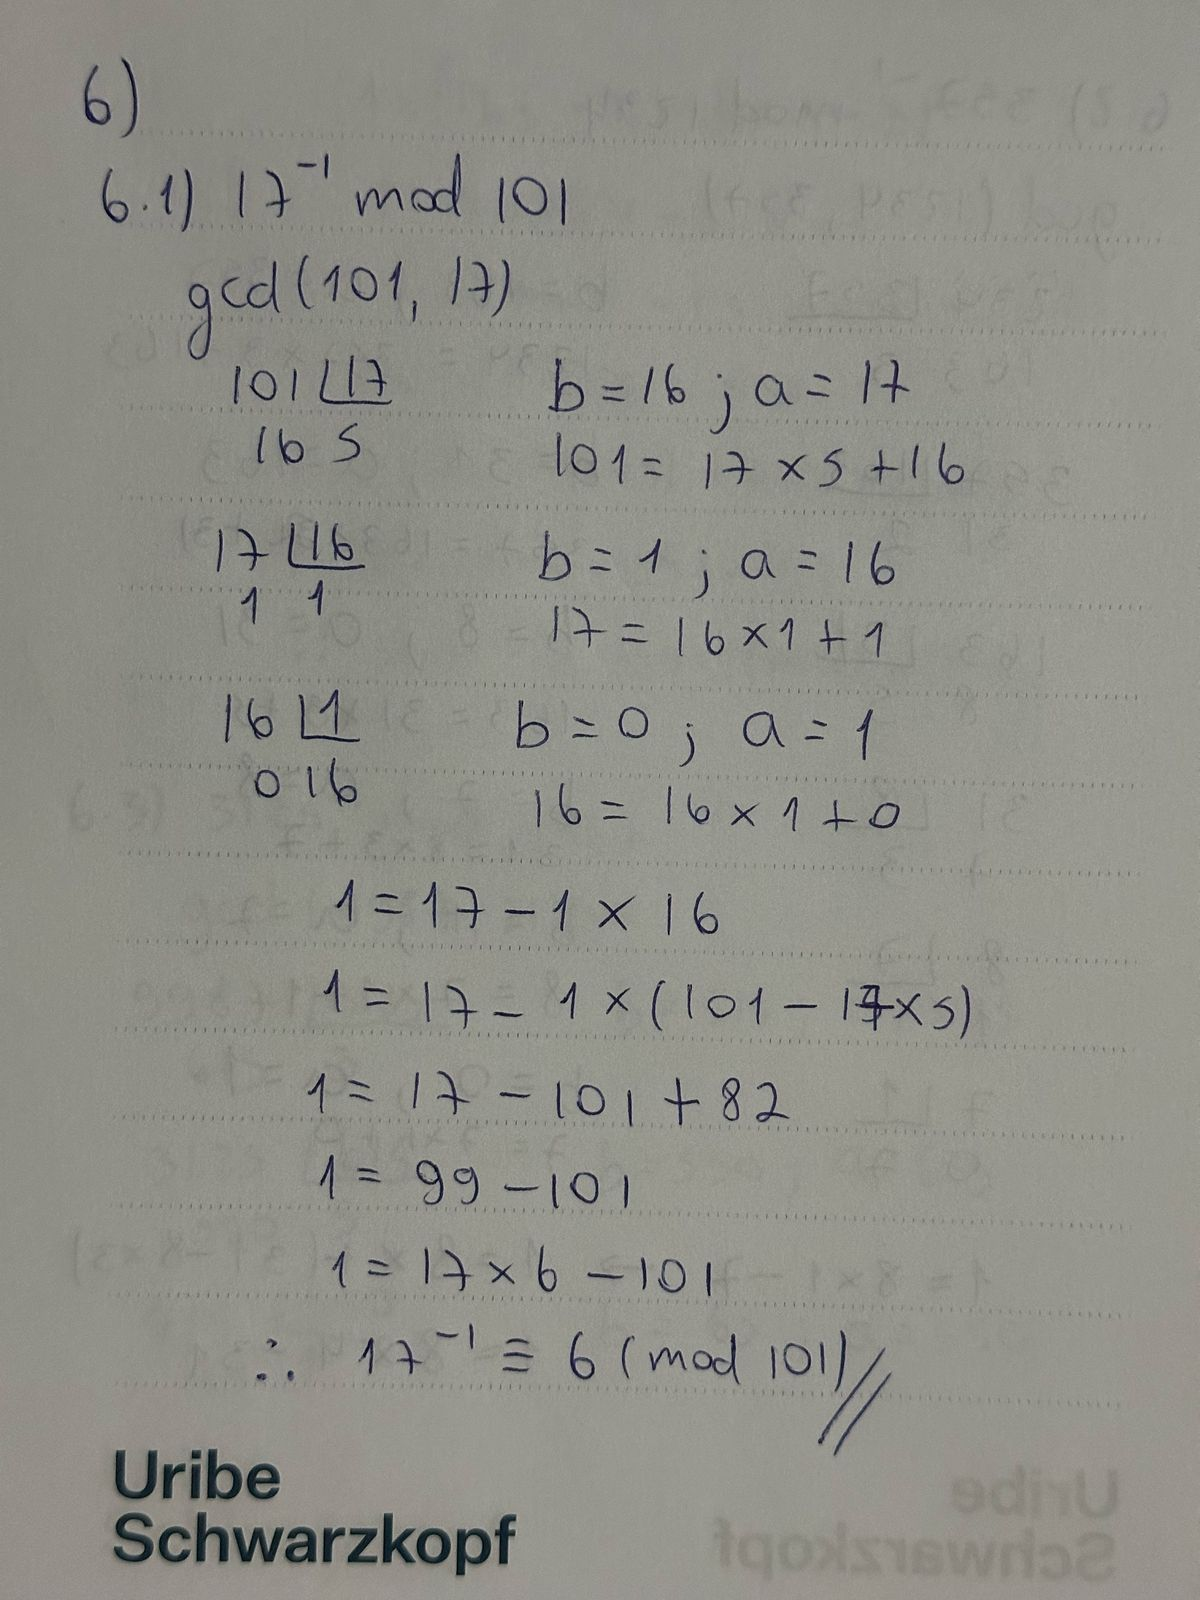

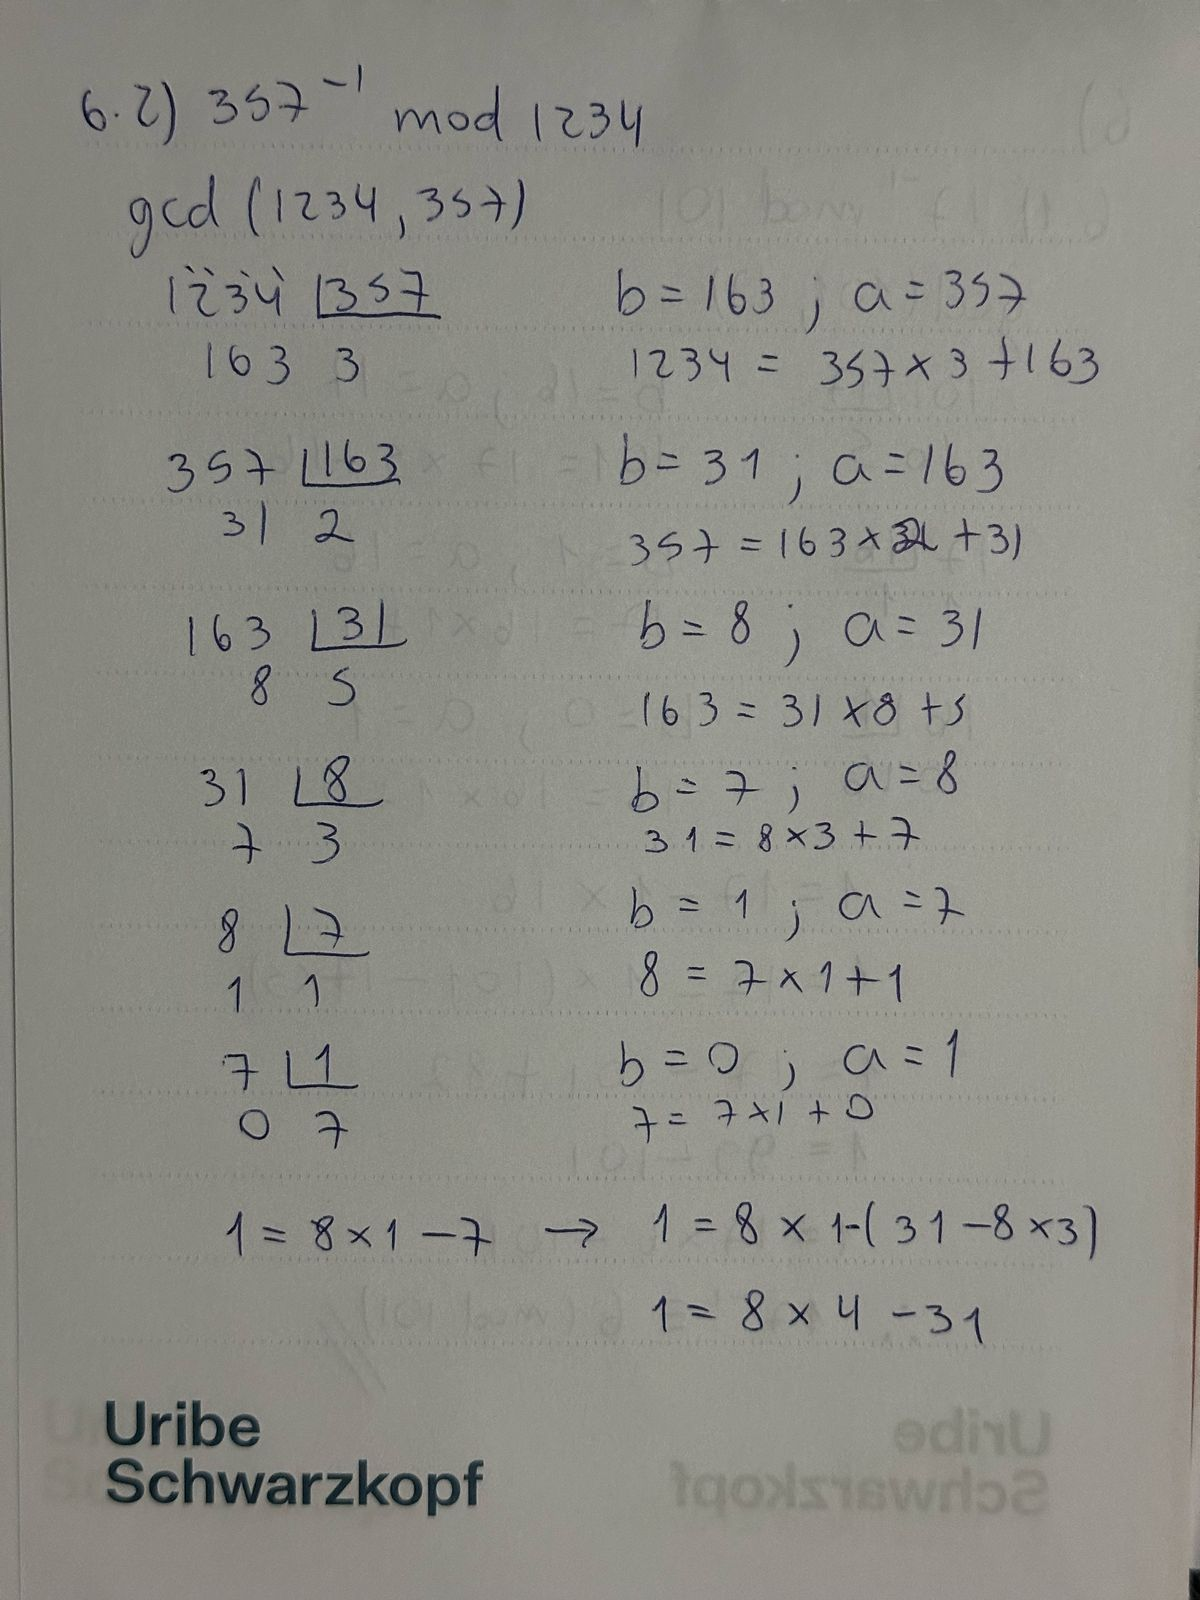

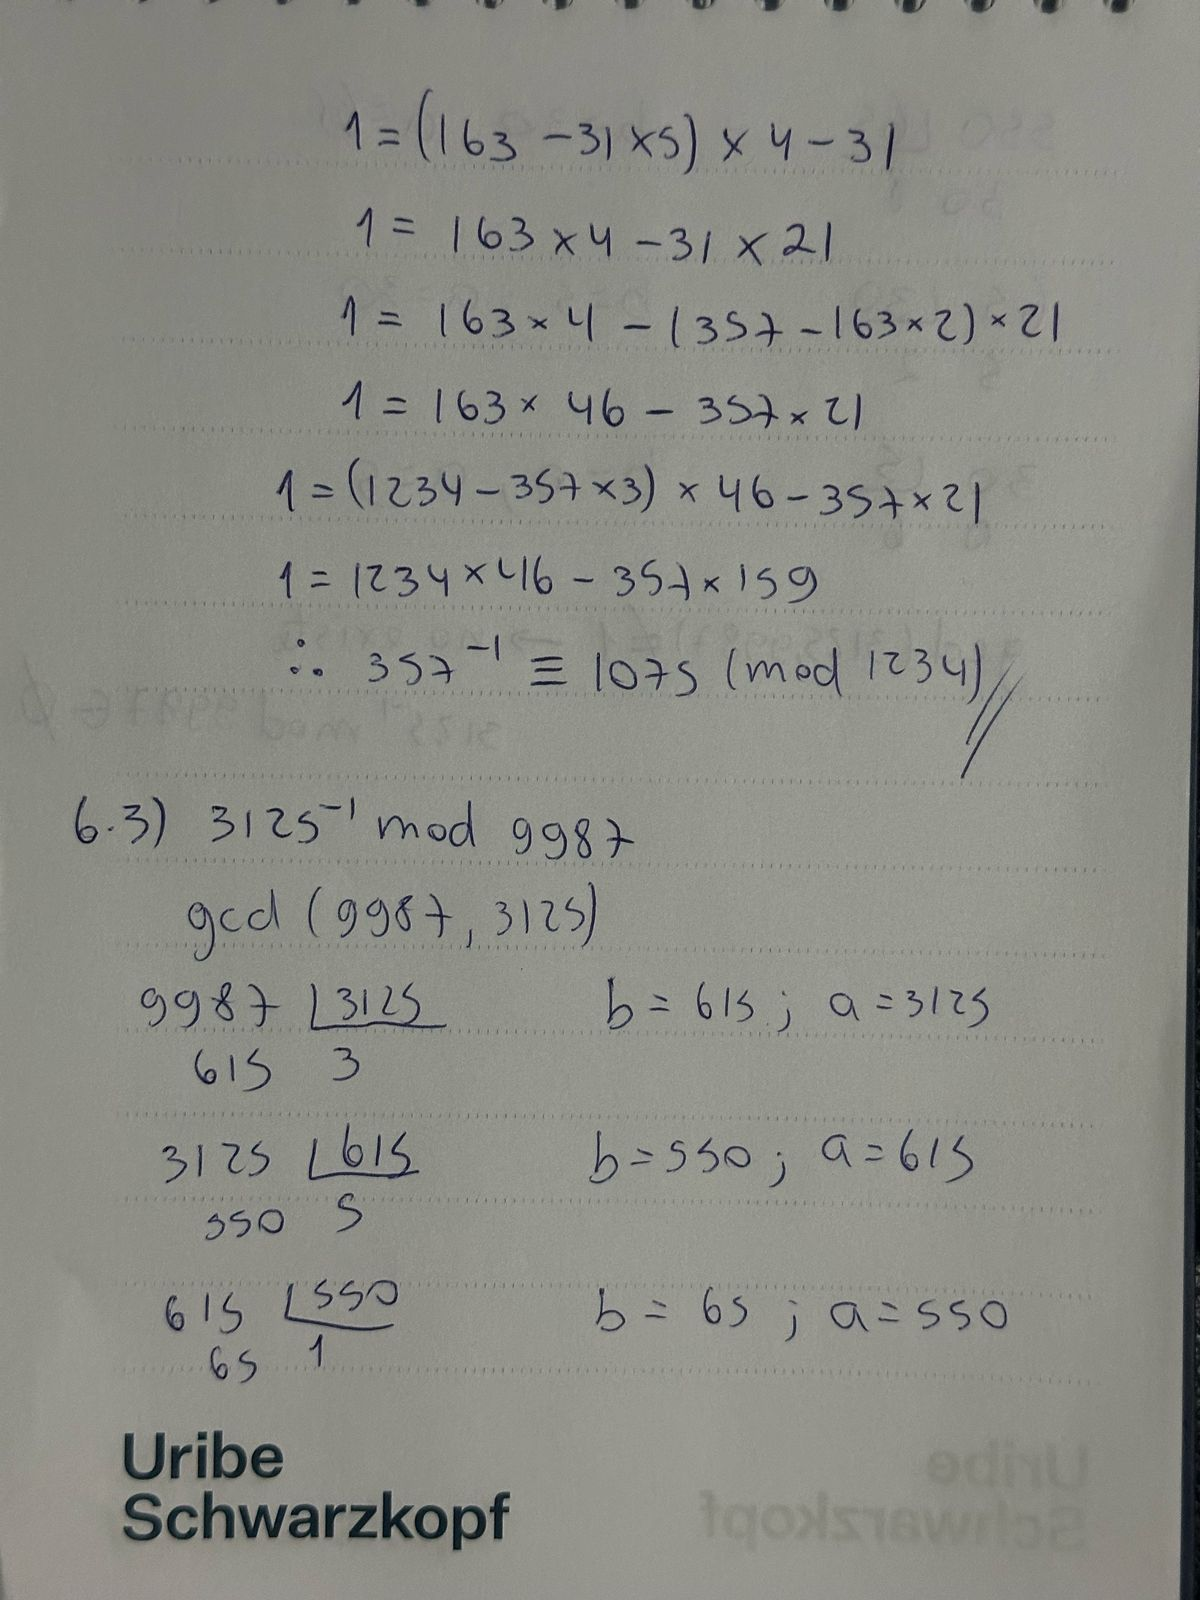

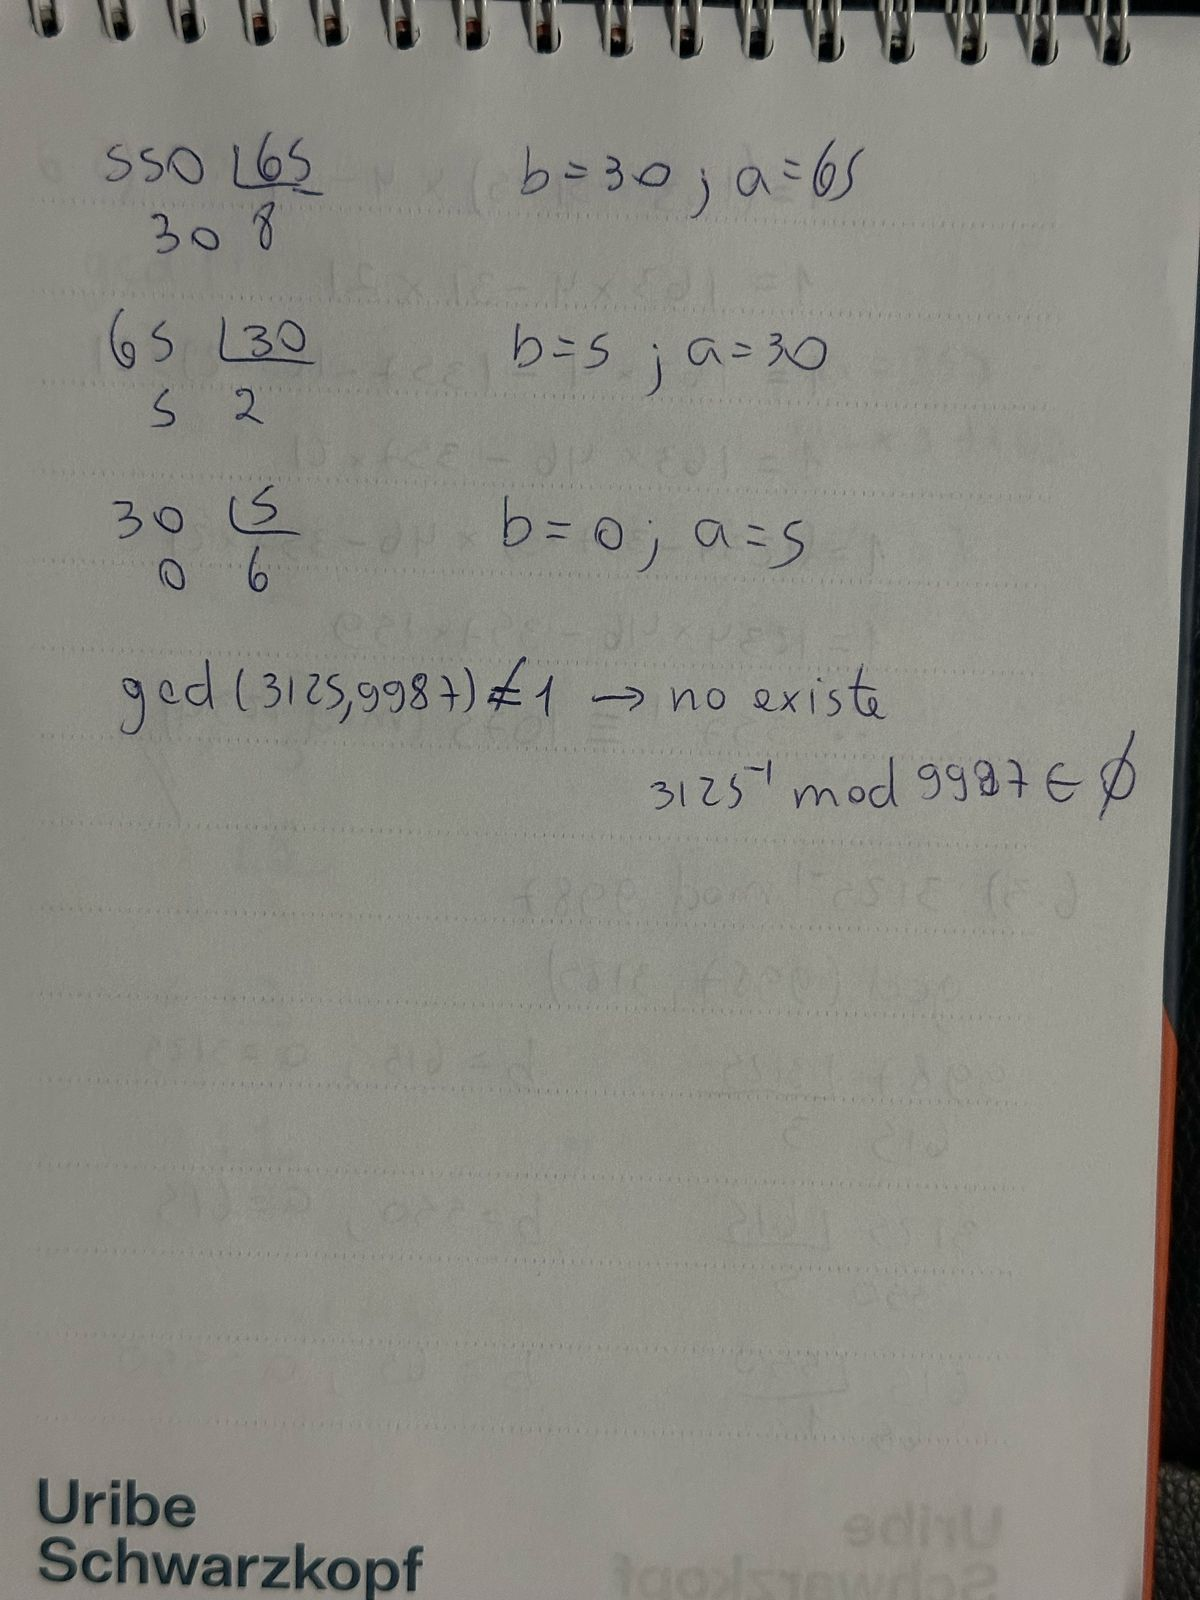